In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import sqlite3
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn_extra.cluster import KMedoids 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import folium
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import IsolationForest
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler

In [9]:
con  = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [10]:
type(con)

sqlite3.Connection

In [11]:
cur = con.cursor()

In [12]:
#These SQL queries select all columns from the
accident_data ="SELECT * FROM accident WHERE accident_year==2020"

In [13]:
#pd for accident
df= pd.read_sql(accident_data, con)

df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [14]:
df['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [15]:
# changing the -1 in the speed limit column to NA
df['speed_limit'] = df['speed_limit'].replace(-1, np.nan)

In [16]:
#Finding the mean of the column having NaN and filling the NaN with the mean
mean_value=df['speed_limit'].mean()
df['speed_limit'].fillna(value=mean_value, inplace=True)
df['speed_limit'] = df['speed_limit'].astype(int)

In [17]:
df['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70, 36])

### adding a new day column to the accident table

In [18]:
df = pd.DataFrame(df)

# Create a dictionary to map numeric values to weekdays
day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Add a new column with the weekdays using the map function
df['day'] = df['day_of_week'].map(day_mapping)

df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,1,9,9,0,0,1,3,2,E01004576,Tuesday
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,1,1,0,0,1,1,2,E01003034,Monday
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,4,1,2,0,0,1,1,2,E01004726,Wednesday
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,1,1,0,0,1,1,2,E01003617,Wednesday
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,4,1,1,0,0,1,1,2,E01004763,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,1,0,0,1,1,-1,-1,Wednesday
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,1,1,1,0,0,1,2,-1,-1,Friday
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,1,0,0,2,1,-1,-1,Wednesday
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,1,1,1,0,0,1,2,-1,-1,Tuesday


# significant days of the week on which accidents occur

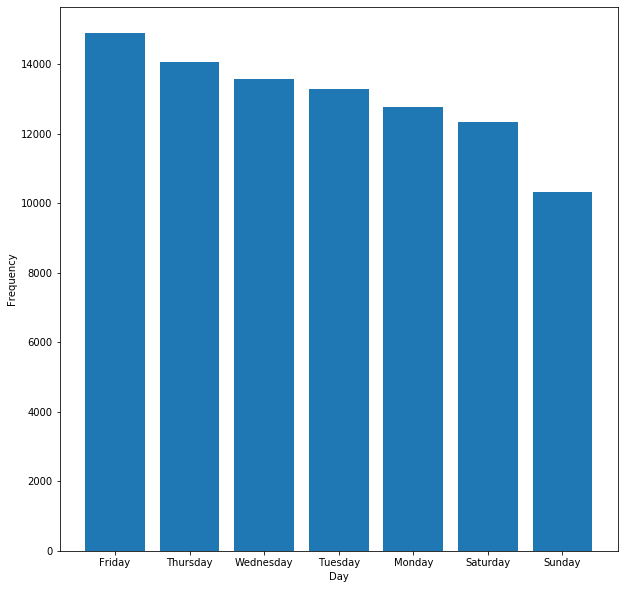

In [19]:
plt.figure(figsize=(10, 10))

day_counts = df['day'].value_counts()
days = day_counts.index
counts = day_counts.values

plt.bar(days, counts)
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.show()

# significant hours of the day on which accidents occur

In [20]:
df = pd.DataFrame(df)

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# adding a hours_only column to the df
df['hours_only'] = df['time'].dt.hour

df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,hours_only
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,9,0,0,1,3,2,E01004576,Tuesday,9
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,1,0,0,1,1,2,E01003034,Monday,13
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,1,2,0,0,1,1,2,E01004726,Wednesday,1
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,1,0,0,1,1,2,E01003617,Wednesday,1
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,1,1,0,0,1,1,2,E01004763,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,0,0,1,1,-1,-1,Wednesday,14
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,1,1,0,0,1,2,-1,-1,Friday,15
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,0,0,2,1,-1,-1,Wednesday,12
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,1,1,0,0,1,2,-1,-1,Tuesday,14


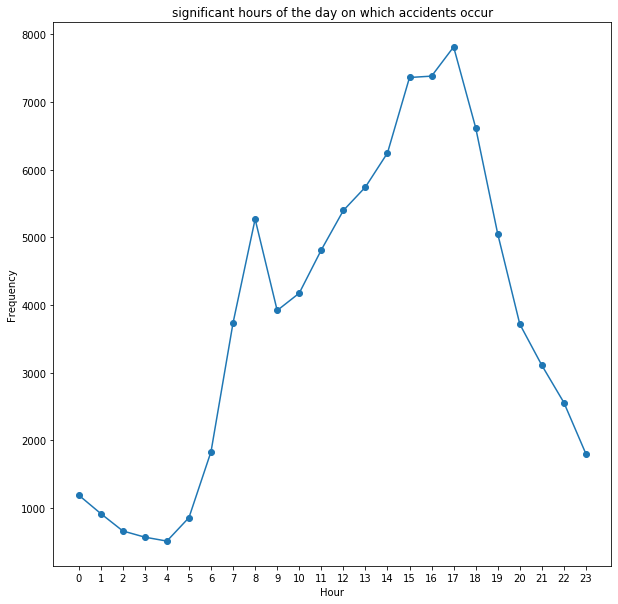

In [21]:
plt.figure(figsize=(10, 10))

# Count occurrences of hour_only column
hour_counts = df['hours_only'].value_counts().sort_index()

# Create a line chart
plt.plot(hour_counts.index, hour_counts.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('significant hours of the day on which accidents occur')

# Set x-axis ticks to display all 24 hours
plt.xticks(range(24))

# Display the line chart
plt.show()

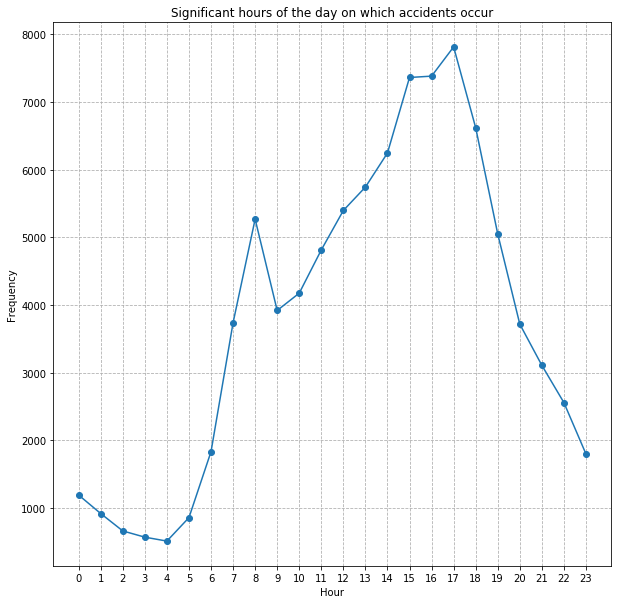

In [22]:
plt.figure(figsize=(10, 10))

# Count occurrences of hour_only column
hour_counts = df['hours_only'].value_counts().sort_index()

# Create a line chart
plt.plot(hour_counts.index, hour_counts.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Significant hours of the day on which accidents occur')

# Set x-axis ticks to display all 24 hours
plt.xticks(range(24))

# Add gridlines
plt.grid(True, linestyle='--')

# Display the line chart
plt.show()

# QUESTION 2

In [23]:
query = '''
    SELECT vehicle.vehicle_type, accident.time, accident.day_of_week, vehicle.accident_year
    FROM vehicle
    JOIN accident ON vehicle.accident_index = accident.accident_index
    WHERE vehicle.accident_year = 2020
    AND vehicle_type IN (2,3,4,5)
'''

cur.execute(query)

# Fetch the results and convert them to a DataFrame
results = cur.fetchall()
columns = ['vehicle_type', 'time', 'day_of_week', 'accident_year']  # Include 'accident_year' in the columns list
df1 = pd.DataFrame(results, columns=columns)
df1

,vehicle_type,time,day_of_week,accident_year
0,3,03:25,4,2020
1,2,08:00,4,2020
2,3,14:00,4,2020
3,3,14:37,4,2020
4,3,19:05,4,2020
...,...,...,...,...
14121,3,16:30,5,2020
14122,3,17:30,4,2020
14123,3,17:55,2,2020
14124,4,15:45,5,2020


In [24]:
df1 = pd.DataFrame(df1)

# Convert the 'time' column to datetime format
df1['time'] = pd.to_datetime(df1['time'])

# adding a hours_only column to the df1
df1['hours_only'] = df1['time'].dt.hour

df1

,vehicle_type,time,day_of_week,accident_year,hours_only
0,3,2023-08-14 03:25:00,4,2020,3
1,2,2023-08-14 08:00:00,4,2020,8
2,3,2023-08-14 14:00:00,4,2020,14
3,3,2023-08-14 14:37:00,4,2020,14
4,3,2023-08-14 19:05:00,4,2020,19
...,...,...,...,...,...
14121,3,2023-08-14 16:30:00,5,2020,16
14122,3,2023-08-14 17:30:00,4,2020,17
14123,3,2023-08-14 17:55:00,2,2020,17
14124,4,2023-08-14 15:45:00,5,2020,15


In [25]:
# Create a dictionary to map numeric values to vehicle type
vehicle_mapping = {
    2: 'Motorcycle 125cc and under',
    3: 'Motorcycle 125cc and under',
    4: 'M/cycle over 125cc and up to 500cc',
    5: 'Motorcycle over 500cc'
}

# Add a new column with the type of motorbike using the map function
df1['type of motorbike'] = df1['vehicle_type'].map(vehicle_mapping)

df1 = pd.DataFrame(df1)

# Create a dictionary to map numeric values to weekdays
day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Add a new column with the weekdays using the map function
df1['day'] = df1['day_of_week'].map(day_mapping)

df1

,vehicle_type,time,day_of_week,accident_year,hours_only,type of motorbike,day
0,3,2023-08-14 03:25:00,4,2020,3,Motorcycle 125cc and under,Wednesday
1,2,2023-08-14 08:00:00,4,2020,8,Motorcycle 125cc and under,Wednesday
2,3,2023-08-14 14:00:00,4,2020,14,Motorcycle 125cc and under,Wednesday
3,3,2023-08-14 14:37:00,4,2020,14,Motorcycle 125cc and under,Wednesday
4,3,2023-08-14 19:05:00,4,2020,19,Motorcycle 125cc and under,Wednesday
...,...,...,...,...,...,...,...
14121,3,2023-08-14 16:30:00,5,2020,16,Motorcycle 125cc and under,Thursday
14122,3,2023-08-14 17:30:00,4,2020,17,Motorcycle 125cc and under,Wednesday
14123,3,2023-08-14 17:55:00,2,2020,17,Motorcycle 125cc and under,Monday
14124,4,2023-08-14 15:45:00,5,2020,15,M/cycle over 125cc and up to 500cc,Thursday


# significant days of the week accidents occur for motorbikes

<Figure size 1080x720 with 0 Axes>

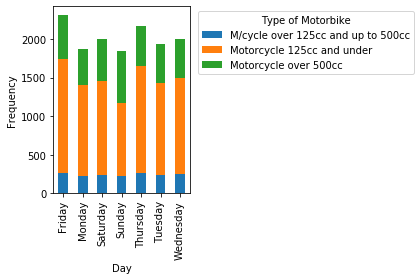

In [26]:
# Creating a cross-tabulation table to get the counts for each day and motorbike type
cross_table = pd.crosstab(df1['day'], df1['type of motorbike'])

# Create the stacked bar chart
plt.figure(figsize=(15, 10))
ax = cross_table.plot(kind='bar', stacked=True)
plt.xlabel("Day")
plt.ylabel("Frequency")

# Move the legend outside the chart area
plt.legend(title='Type of Motorbike', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust the layout to avoid overlapping of the legend
plt.tight_layout()

plt.show()

# significant hours of the day on which accidents occur for motorbikes

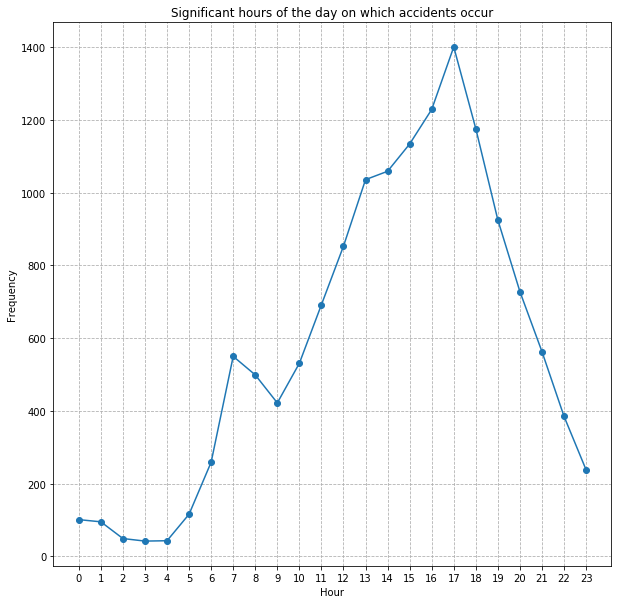

In [27]:
plt.figure(figsize=(10, 10))
# Count occurrences of each hour in the 'hours_only' column
hour_counts = df1['hours_only'].value_counts().sort_index()

# Create a line chart
plt.plot(hour_counts.index, hour_counts.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Significant hours of the day on which accidents occur')

# Set x-axis ticks to display all 24 hours
plt.xticks(range(24))

# Add gridlines
plt.grid(True, linestyle='--')

# Display the line chart
plt.show()

# QUESTION 3

In [28]:
query = '''
    SELECT casualty.casualty_class, accident.time, accident.day_of_week, casualty.accident_year
    FROM casualty
    JOIN accident ON casualty.accident_index = accident.accident_index
    WHERE casualty.accident_year = 2020
    AND casualty.casualty_class = 3;
'''

cur.execute(query)

# Fetch the results and convert them to a DataFrame
results = cur.fetchall()
columns = ['casualty_class', 'time', 'day_of_week', 'accident_year']
df2 = pd.DataFrame(results, columns=columns)
df2

,casualty_class,time,day_of_week,accident_year
0,3,09:00,3,2020
1,3,13:55,2,2020
2,3,13:55,2,2020
3,3,01:25,4,2020
4,3,01:50,4,2020
...,...,...,...,...
14745,3,10:30,3,2020
14746,3,17:00,2,2020
14747,3,12:00,3,2020
14748,3,15:05,6,2020


In [29]:
# Create a dictionary to map numeric values to casualty type
casualty_mapping = {
    3: 'pedestrians'
}

# Add a new column with the type of casualty using the map function
df2['type of casualty'] = df2['casualty_class'].map(casualty_mapping)

df2 = pd.DataFrame(df2)

# Create a dictionary to map numeric values to weekdays
day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Add a new column with the weekdays using the map function
df2['day'] = df2['day_of_week'].map(day_mapping)

#dataframe
df2 = pd.DataFrame(df2)

# Convert the 'time' column to datetime format
df2['time'] = pd.to_datetime(df2['time'])

# Add a new column with the hours only
df2['hours_only'] = df2['time'].dt.hour

df2

,casualty_class,time,day_of_week,accident_year,type of casualty,day,hours_only
0,3,2023-08-14 09:00:00,3,2020,pedestrians,Tuesday,9
1,3,2023-08-14 13:55:00,2,2020,pedestrians,Monday,13
2,3,2023-08-14 13:55:00,2,2020,pedestrians,Monday,13
3,3,2023-08-14 01:25:00,4,2020,pedestrians,Wednesday,1
4,3,2023-08-14 01:50:00,4,2020,pedestrians,Wednesday,1
...,...,...,...,...,...,...,...
14745,3,2023-08-14 10:30:00,3,2020,pedestrians,Tuesday,10
14746,3,2023-08-14 17:00:00,2,2020,pedestrians,Monday,17
14747,3,2023-08-14 12:00:00,3,2020,pedestrians,Tuesday,12
14748,3,2023-08-14 15:05:00,6,2020,pedestrians,Friday,15


# significant hours of the day pedestrians more likely to be involved in accident

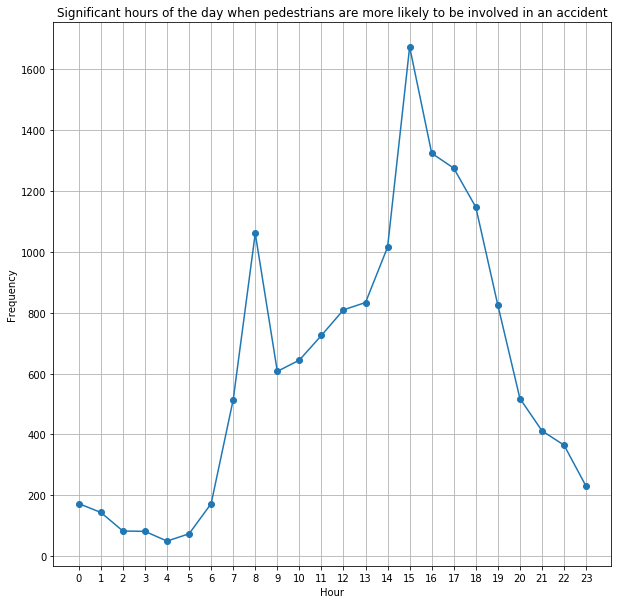

In [30]:
plt.figure(figsize=(10, 10))
# Count occurrences of each hour in the 'hours_only' column
hour_counts = df2['hours_only'].value_counts().sort_index()

# Create a line chart
plt.plot(hour_counts.index, hour_counts.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Significant hours of the day when pedestrians are more likely to be involved in an accident')

# Set x-axis ticks to display all 24 hours
plt.xticks(range(24))

# Add gridlines
plt.grid(True)

# Display the line chart
plt.show()


# significant days of the week pedestrians more likely to be involved in accident

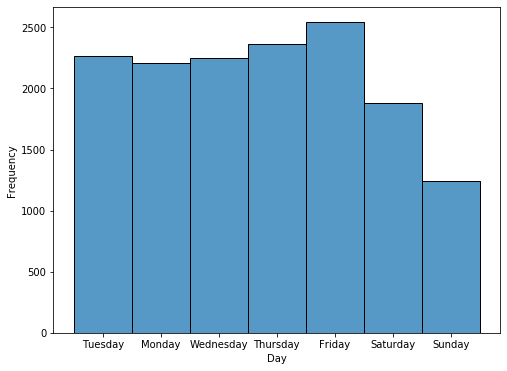

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df2['day'], bins=7, kde=False)
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.show()


# QUESTION 4

In [32]:
query = '''
    SELECT accident.accident_severity, casualty.casualty_class, vehicle.vehicle_type,accident.weather_conditions,accident.road_type,accident.speed_limit,accident.road_surface_conditions,accident.light_conditions
    FROM vehicle
    JOIN casualty ON vehicle.accident_index = casualty.accident_index 
    JOIN accident ON casualty.accident_index = accident.accident_index 
    WHERE vehicle.accident_year = 2020
    AND vehicle_type IN (2, 3, 4, 5);

'''

cur.execute(query)

# Fetch the results and convert them to a DataFrame
results = cur.fetchall()
columns = ['accident_severity', 'casualty_class', 'vehicle_type','weather_conditions','road_type','speed_limit','road_surface_conditions','light_conditions']
df3 = pd.DataFrame(results, columns=columns)
df3

,accident_severity,casualty_class,vehicle_type,weather_conditions,road_type,speed_limit,road_surface_conditions,light_conditions
0,3,1,3,1,3,30,1,4
1,2,1,2,1,6,30,1,1
2,3,3,3,1,6,20,1,1
3,3,1,3,1,3,30,1,1
4,3,3,3,1,6,30,1,4
...,...,...,...,...,...,...,...,...
15471,3,1,3,1,6,30,1,4
15472,3,1,3,8,6,30,2,4
15473,2,1,3,1,6,30,1,4
15474,3,1,4,1,6,20,1,1


In [33]:
columns_with_minus_one = [col for col in df3.columns if (df3[col] == -1).any()]

print("Columns containing -1 entry:", columns_with_minus_one)

Columns containing -1 entry: ['road_surface_conditions']


In [34]:
# Calculate the mean of the column, excluding -1 values
mean_value = int(df3[df3['road_surface_conditions'] != -1]['road_surface_conditions'].mean())

# Replace -1 values with the calculated mean
df3['road_surface_conditions'] = df3['road_surface_conditions'].replace(-1, mean_value)

In [35]:
df3

,accident_severity,casualty_class,vehicle_type,weather_conditions,road_type,speed_limit,road_surface_conditions,light_conditions
0,3,1,3,1,3,30,1,4
1,2,1,2,1,6,30,1,1
2,3,3,3,1,6,20,1,1
3,3,1,3,1,3,30,1,1
4,3,3,3,1,6,30,1,4
...,...,...,...,...,...,...,...,...
15471,3,1,3,1,6,30,1,4
15472,3,1,3,8,6,30,2,4
15473,2,1,3,1,6,30,1,4
15474,3,1,4,1,6,20,1,1


In [36]:
columns_with_minus_one = [col for col in df3.columns if (df3[col] == -1).any()]

print("Columns containing -1 entry:", columns_with_minus_one)

Columns containing -1 entry: []


## One-hot encoding

In [37]:
road_surface_conditions=pd.get_dummies(df3.road_surface_conditions,prefix='road_surface_conditions')
road_surface_conditions

,road_surface_conditions_1,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,road_surface_conditions_9
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
15471,1,0,0,0,0,0
15472,0,1,0,0,0,0
15473,1,0,0,0,0,0
15474,1,0,0,0,0,0


In [38]:
light_conditions=pd.get_dummies(df3.light_conditions,prefix='light_conditions')
light_conditions

,light_conditions_1,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
15471,0,1,0,0,0
15472,0,1,0,0,0
15473,0,1,0,0,0
15474,1,0,0,0,0


In [39]:
speed_limit=pd.get_dummies(df3.speed_limit,prefix='speed_limit')
speed_limit

,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
15471,0,1,0,0,0,0
15472,0,1,0,0,0,0
15473,0,1,0,0,0,0
15474,1,0,0,0,0,0


In [40]:
severity=pd.get_dummies(df3.accident_severity,prefix='severity')
severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
15471,0,0,1
15472,0,0,1
15473,0,1,0
15474,0,0,1


In [41]:
casualty_class=pd.get_dummies(df3.casualty_class,prefix='casualty_class')
casualty_class

,casualty_class_1,casualty_class_2,casualty_class_3
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
15471,1,0,0
15472,1,0,0
15473,1,0,0
15474,1,0,0


In [42]:
vehicle_type=pd.get_dummies(df3.vehicle_type,prefix='vehicle_type')
vehicle_type

,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
15471,0,1,0,0
15472,0,1,0,0
15473,0,1,0,0
15474,0,0,1,0


In [43]:
weather_conditions_type=pd.get_dummies(df3.vehicle_type,prefix='weather_conditions')
weather_conditions_type

,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
15471,0,1,0,0
15472,0,1,0,0
15473,0,1,0,0
15474,0,0,1,0


In [44]:
road_type_type=pd.get_dummies(df3.vehicle_type,prefix='road_type')
road_type_type

,road_type_2,road_type_3,road_type_4,road_type_5
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
15471,0,1,0,0
15472,0,1,0,0
15473,0,1,0,0
15474,0,0,1,0


## Concatinating the 8 data tables

In [45]:
frames = [vehicle_type,casualty_class, severity,weather_conditions_type,road_type_type,speed_limit,road_surface_conditions,light_conditions]
df4 = pd.concat(frames,axis=1,ignore_index=False)
df4

,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5,casualty_class_1,casualty_class_2,casualty_class_3,severity_1,severity_2,severity_3,...,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,road_surface_conditions_9,light_conditions_1,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
15472,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
15473,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15474,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# apriori algorithm

In [46]:
# Set the max_colwidth to None to display full text in itemsets
pd.set_option("display.max_colwidth", None)

# Apply the Apriori algorithm with the specified parameters
data = apriori(df4, min_support=0.3, use_colnames=True)

# Create a new column "length" to store the length of each itemset
data['length'] = data['itemsets'].apply(lambda x: len(x))
data

,support,itemsets,length
0,0.518609,(vehicle_type_3),1
1,0.930408,(casualty_class_1),1
2,0.313453,(severity_2),1
3,0.660765,(severity_3),1
4,0.518609,(weather_conditions_3),1
...,...,...,...
82,0.341626,"(weather_conditions_3, road_type_3, casualty_class_1, road_surface_conditions_1)",4
83,0.327410,"(road_type_3, light_conditions_1, casualty_class_1, weather_conditions_3)",4
84,0.369217,"(road_type_3, severity_3, vehicle_type_3, casualty_class_1, weather_conditions_3)",5
85,0.341626,"(road_type_3, road_surface_conditions_1, vehicle_type_3, casualty_class_1, weather_conditions_3)",5


In [47]:
#  We set our metric as "Lift" to define whether antecedents & consequents are dependent our not
rules = association_rules(data, metric="lift", min_threshold=1.14)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
246,"(vehicle_type_3, severity_3)","(road_type_3, casualty_class_1, weather_conditions_3)",0.387568,0.489403,0.369217,0.952651,1.946557,0.179540,10.783666,0.794002,2,3
87,"(vehicle_type_3, severity_3)","(casualty_class_1, weather_conditions_3)",0.387568,0.489403,0.369217,0.952651,1.946557,0.179540,10.783666,0.794002,2,2
248,"(severity_3, weather_conditions_3)","(vehicle_type_3, road_type_3, casualty_class_1)",0.387568,0.489403,0.369217,0.952651,1.946557,0.179540,10.783666,0.794002,2,3
244,"(road_type_3, casualty_class_1)","(vehicle_type_3, severity_3, weather_conditions_3)",0.489403,0.387568,0.369217,0.754423,1.946557,0.179540,2.493850,0.952361,2,3
242,"(road_type_3, severity_3)","(vehicle_type_3, casualty_class_1, weather_conditions_3)",0.387568,0.489403,0.369217,0.952651,1.946557,0.179540,10.783666,0.794002,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
57,"(casualty_class_1, weather_conditions_3)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,2,1
253,(severity_3),"(vehicle_type_3, road_type_3, casualty_class_1, weather_conditions_3)",0.660765,0.489403,0.369217,0.558772,1.141742,0.045836,1.157218,0.365956,1,4
201,"(road_type_3, casualty_class_1, weather_conditions_3)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,3,1
94,(severity_3),"(vehicle_type_3, casualty_class_1, weather_conditions_3)",0.660765,0.489403,0.369217,0.558772,1.141742,0.045836,1.157218,0.365956,1,3


In [48]:
# Filter the rules where consequents_length is equal to 1
rules_filtered = rules[rules["consequents_length"] == 1]

# Filter the rules where the consequents contain 'severity_3' or 'severity_2' or 'severity_1'
severity_conditions = ['severity_3', 'severity_2', 'severity_1']
rules_filtered = rules_filtered[rules_filtered["consequents"].apply(lambda x: any(item in x for item in severity_conditions))]

# Sort the filtered rules by lift in descending order
rules_filtered = rules_filtered.sort_values("lift", ascending=False)

# Display the filtered rules
rules_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
6,"(vehicle_type_3, casualty_class_1)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,2,1
57,"(casualty_class_1, weather_conditions_3)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,2,1
60,"(road_type_3, casualty_class_1)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,2,1
85,"(vehicle_type_3, casualty_class_1, weather_conditions_3)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,3,1
97,"(vehicle_type_3, road_type_3, casualty_class_1)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,3,1
201,"(road_type_3, casualty_class_1, weather_conditions_3)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,3,1
230,"(vehicle_type_3, road_type_3, casualty_class_1, weather_conditions_3)",(severity_3),0.489403,0.660765,0.369217,0.754423,1.141742,0.045836,1.381379,0.243137,4,1


# QUESTION 5

In [49]:
query = '''
    SELECT accident.latitude, accident.longitude, lsoa.lsoa01nm, accident.police_force,accident.accident_year
    FROM accident  
    JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
    WHERE lsoa01nm LIKE "%North Lincolnshire%" AND accident.accident_year = 2020
    OR lsoa01nm LIKE "%kingston upon hull%"  AND accident.accident_year = 2020
    OR lsoa01nm LIKE "%North East Lincolnshire%"  AND accident.accident_year = 2020
    OR lsoa01nm LIKE "%East Riding of Yorkshire%" AND accident.accident_year = 2020
'''

cur.execute(query)

# Fetch the results and convert them to a DataFrame
results = cur.fetchall()
columns = ['latitude', 'longitude', 'lsoa01nm','police_force','accident_year']
df4 = pd.DataFrame(results, columns=columns)
df4

,latitude,longitude,lsoa01nm,police_force,accident_year
0,53.744936,-0.393424,Kingston upon Hull 028E,16,2020
1,53.512895,-0.528743,North Lincolnshire 022C,16,2020
2,53.791630,-0.324858,Kingston upon Hull 002E,16,2020
3,53.574501,-0.095008,North East Lincolnshire 003C,16,2020
4,53.767805,-0.327733,Kingston upon Hull 016D,16,2020
...,...,...,...,...,...
1658,53.566753,-0.651104,North Lincolnshire 017B,16,2020
1659,53.839482,-0.424674,East Riding of Yorkshire 019D,16,2020
1660,53.782750,-0.308880,Kingston upon Hull 007C,16,2020
1661,53.569801,-0.703181,North Lincolnshire 005A,16,2020


In [50]:
# Split the 'lsoa01nm' column and take the first part as the location
df4['location'] = df4['lsoa01nm'].str.split().str[:-1].str.join(' ')

df4

,latitude,longitude,lsoa01nm,police_force,accident_year,location
0,53.744936,-0.393424,Kingston upon Hull 028E,16,2020,Kingston upon Hull
1,53.512895,-0.528743,North Lincolnshire 022C,16,2020,North Lincolnshire
2,53.791630,-0.324858,Kingston upon Hull 002E,16,2020,Kingston upon Hull
3,53.574501,-0.095008,North East Lincolnshire 003C,16,2020,North East Lincolnshire
4,53.767805,-0.327733,Kingston upon Hull 016D,16,2020,Kingston upon Hull
...,...,...,...,...,...,...
1658,53.566753,-0.651104,North Lincolnshire 017B,16,2020,North Lincolnshire
1659,53.839482,-0.424674,East Riding of Yorkshire 019D,16,2020,East Riding of Yorkshire
1660,53.782750,-0.308880,Kingston upon Hull 007C,16,2020,Kingston upon Hull
1661,53.569801,-0.703181,North Lincolnshire 005A,16,2020,North Lincolnshire


In [51]:
df4['location'].unique()

array(['Kingston upon Hull', 'North Lincolnshire',
       'North East Lincolnshire', 'East Riding of Yorkshire'],
      dtype=object)

In [52]:
df4.isnull().sum()

latitude         0
longitude        0
lsoa01nm         0
police_force     0
accident_year    0
location         0
dtype: int64

### k-Means clustering

In [53]:

X=np.array(list(zip(df4["longitude"],df4["latitude"])))

In [54]:
X

array([[-0.393424, 53.744936],
       [-0.528743, 53.512895],
       [-0.324858, 53.79163 ],
       ...,
       [-0.30888 , 53.78275 ],
       [-0.703181, 53.569801],
       [-0.342063, 53.742609]])

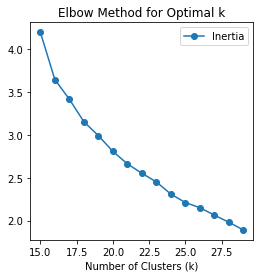

In [55]:
inertia = []
K = range(15,30)

for k in K:
    # Calculate inertia
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    inertia.append(km.inertia_)


# Plotting the Inertia 

plt.figure(figsize=(4, 4))
plt.plot(K, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

In [56]:
#finding the elbow using kneed locator
from kneed import KneeLocator
kl = KneeLocator(range(15, 30), inertia, curve="convex", direction="decreasing")
kl.elbow

20

In [57]:
inertia

[4.19763808890343,
 3.645729804093566,
 3.4164964052151885,
 3.154449854515221,
 2.991453940044576,
 2.8079866481584754,
 2.662490787258536,
 2.5525252090363795,
 2.451606339623522,
 2.3099700958601876,
 2.2104608381190043,
 2.150861199480069,
 2.064308655137715,
 1.9811586283059615,
 1.8910166478098258]

In [58]:
kmeans = KMeans(n_clusters=21, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=21, random_state=0)

In [59]:
kmeans_labels=kmeans.predict(X)
centriods= kmeans.cluster_centers_

In [60]:
kmeans_labels

array([18, 20, 11, ..., 11,  1,  2])

In [61]:
kmeans

KMeans(n_clusters=21, random_state=0)

In [62]:
centriods

array([[-1.70794161e-01,  5.37495703e+01],
       [-6.55831348e-01,  5.35848857e+01],
       [-3.60906488e-01,  5.37579108e+01],
       [-7.74800502e-02,  5.35568271e+01],
       [-8.82868200e-01,  5.38388514e+01],
       [-2.04258844e-01,  5.40854989e+01],
       [-3.56772432e-01,  5.36125669e+01],
       [-4.64850622e-01,  5.40098439e+01],
       [-5.83394200e-01,  5.37644263e+01],
       [-8.20900967e-01,  5.35616712e+01],
       [-4.58196600e-01,  5.37048340e+01],
       [-3.02121425e-01,  5.37677285e+01],
       [-4.37262484e-01,  5.38438944e+01],
       [-6.94760926e-01,  5.38346633e+01],
       [-8.15204226e-01,  5.39584000e+01],
       [-8.91515069e-01,  5.37115196e+01],
       [-1.08519375e-02,  5.37146241e+01],
       [-2.57055138e-01,  5.38933905e+01],
       [-4.11763829e-01,  5.37492155e+01],
       [-1.89686512e-01,  5.35856186e+01],
       [-5.41958372e-01,  5.35346689e+01]])

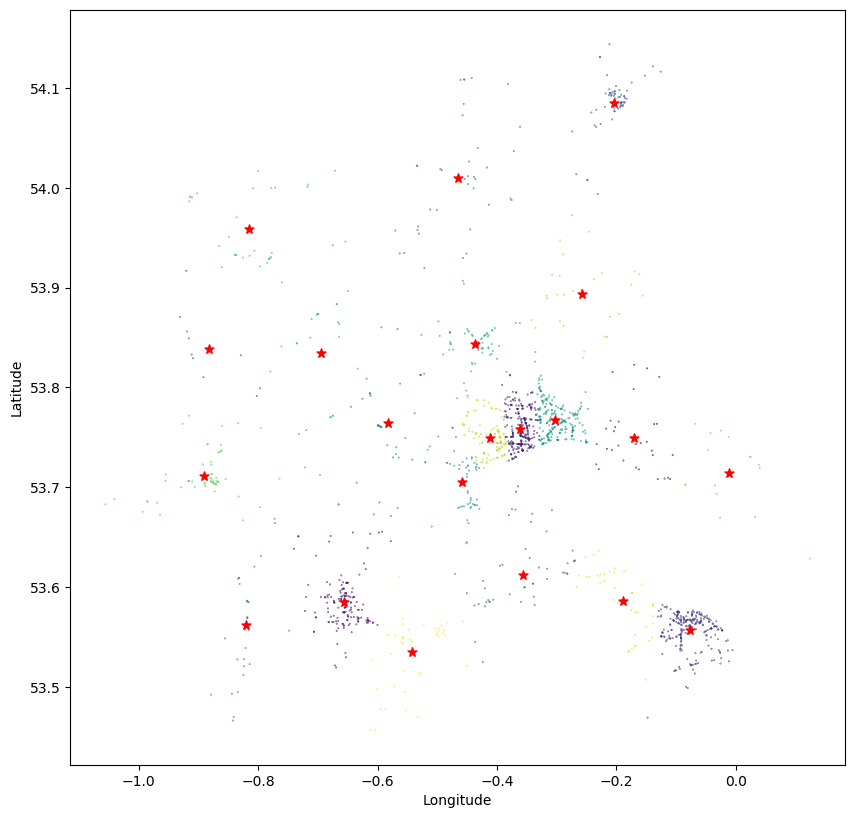

In [63]:
# Create the scatter plot
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(X[:, 0], X[:, 1], s=0.1, rasterized=True, c=kmeans_labels)
plt.scatter(centriods.T[0], centriods.T[1], c="r", marker="*", s=45, rasterized=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [64]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [65]:
# Calculate the center coordinates for the map
center_lat = X[:, 1].mean()
center_lng = X[:, 0].mean()

# Create a folium map centered around the calculated coordinates
map_center = [center_lat, center_lng]
my_map = folium.Map(location=map_center, zoom_start=10)

# Create a cycle of cluster colors to cover all clusters
cluster_colors = itertools.cycle(['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'cyan', 'magenta'])

for cluster_num in range(len(centriods)):
    cluster_points_lat = X[kmeans_labels == cluster_num][:, 1]
    cluster_points_lon = X[kmeans_labels == cluster_num][:, 0]
    color = next(cluster_colors)
    for lat, lon in zip(cluster_points_lat, cluster_points_lon):
        folium.CircleMarker([lat, lon], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(my_map)

# Add centroids to the map
for lat, lon in zip(centriods[:, 1], centriods[:, 0]):
    folium.Marker([lat, lon], icon=folium.Icon(color='red', icon='star')).add_to(my_map)

# Display the map
my_map

### k-medoids

In [66]:
kMedoids = KMedoids(n_clusters = 21, random_state = 0)
kMedoids.fit(X)

KMedoids(n_clusters=21, random_state=0)

In [67]:
kMedoids.inertia_

75.02974318855291

In [68]:
centroid=kMedoids.cluster_centers_
centroid

array([[-0.202563, 54.087164],
       [-0.3601  , 53.753689],
       [-0.303453, 53.76038 ],
       [-0.377337, 53.782266],
       [-0.323221, 53.785872],
       [-0.353753, 53.768623],
       [-0.449899, 53.858543],
       [-0.343666, 53.748492],
       [-0.358567, 53.743214],
       [-0.400627, 53.74452 ],
       [-0.363477, 53.743308],
       [-0.375795, 53.750245],
       [-0.374434, 53.72814 ],
       [-0.462854, 53.722239],
       [-0.862659, 53.742558],
       [-0.256801, 53.762309],
       [-0.082359, 53.560644],
       [-0.357108, 53.737081],
       [-0.250391, 53.610494],
       [-0.500528, 53.553005],
       [-0.658499, 53.584545]])

In [69]:
kmedoids_labels=kMedoids.labels_
kmedoids_labels

array([ 9, 19,  4, ...,  4, 20,  7], dtype=int64)

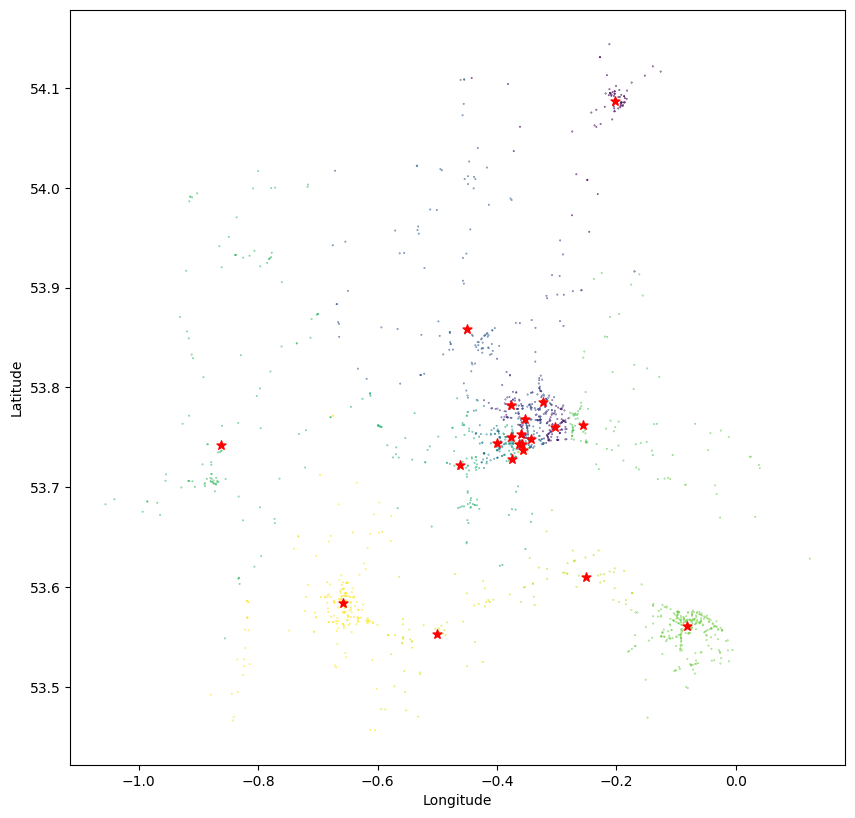

In [70]:
# Create the scatter plot
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(X[:, 0], X[:, 1], s=0.1, rasterized=True, c=kmedoids_labels) 
plt.scatter(centroid[:, 0], centroid[:, 1], c="r", marker="*", s=45, rasterized=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [71]:
# Calculate the center coordinates for the map
center_lat = X[:, 1].mean()
center_lng = X[:, 0].mean()

# Create a folium map centered around the calculated coordinates
map_center = [center_lat, center_lng]
my_map = folium.Map(location=map_center, zoom_start=10)

# Create a cycle of cluster colors to cover all clusters
cluster_colors = itertools.cycle(['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'cyan', 'magenta'])

for cluster_num in range(len(centroid)):
    cluster_points_lat = X[kmeans_labels == cluster_num][:, 1]
    cluster_points_lon = X[kmeans_labels == cluster_num][:, 0]
    color = next(cluster_colors)
    for lat, lon in zip(cluster_points_lat, cluster_points_lon):
        folium.CircleMarker([lat, lon], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(my_map)

# Add centroids to the map
for lat, lon in zip(centroid[:, 1], centroid[:, 0]):
    folium.Marker([lat, lon], icon=folium.Icon(color='red', icon='star')).add_to(my_map)

# Display the map
my_map

### silhouette score for the 2 algorithms

In [72]:
# Perform KMeans clustering and compute silhouette score
kmeans = KMeans(n_clusters=21) 
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

# Perform KMedoids clustering and compute silhouette score
kmedoids = KMedoids(n_clusters=21) 
kmedoids_labels = kmedoids.fit_predict(X)
kmedoids_silhouette_score = silhouette_score(X, kmedoids_labels)

print("Silhouette Score for K-Means:", kmeans_silhouette_score)
print("Silhouette Score for K-Medoids:", kmedoids_silhouette_score)

Silhouette Score for K-Means: 0.5062357346977508
Silhouette Score for K-Medoids: 0.32943194672736215


# QUESTION 6

In [73]:
# Connect to the database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

# SQL queries to select data for the year 2020 and the most severe casualty for each accident
res = cur.execute('''
    SELECT *
    FROM accident
    WHERE accident_year = 2020
''')


df_merged= pd.read_sql('''
    SELECT *
    FROM accident
    WHERE accident_year = 2020
''',con)

pd.set_option("display.max_columns",None)
df_merged

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [74]:
# Step 1: Filter rows where junction_detail is 0
rows_with_junction_detail_0 = df_merged[df_merged['junction_detail'] == 0]

# Step 2: Set junction_control to blank for the filtered rows
df_merged.loc[rows_with_junction_detail_0.index, 'junction_control'] = ''

# Print the updated DataFrame
df_merged

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [75]:
df_merged['junction_control'].value_counts()

4     39996
      37978
2     10407
9      1536
3       583
1       377
-1      322
Name: junction_control, dtype: int64

In [76]:
# Replace every 9 with NaN in the 'junction_control' column
df_merged['junction_control'] = df_merged['junction_control'].replace(9, pd.NA)
df_merged

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [77]:
df_merged['junction_control'].value_counts()

4     39996
      37978
2     10407
3       583
1       377
-1      322
Name: junction_control, dtype: int64

In [78]:
df_merged['junction_detail'].value_counts()

 0     37978
 3     25626
 6      8429
 1      7326
 9      4705
 8      1887
 99     1508
 2      1300
 7      1279
 5      1159
-1         2
Name: junction_detail, dtype: int64

In [79]:
# Replace every 9 with NaN in the 'junction_control' column
df_merged['junction_detail'] = df_merged['junction_detail'].replace(99, np.nan)

In [80]:
df_merged['junction_detail'].value_counts()

 0.0    37978
 3.0    25626
 6.0     8429
 1.0     7326
 9.0     4705
 8.0     1887
 2.0     1300
 7.0     1279
 5.0     1159
-1.0        2
Name: junction_detail, dtype: int64

In [81]:
# Count the number of occurrences of -1 in each column
count_of_minus_1 = df_merged.apply(lambda x: (x == -1).sum())

# Print the counts for each column
print(count_of_minus_1)

accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                              0
location_northing_osgr                             0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                         991
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

In [82]:
# Drop the 'second_road_number' column
df_merged.drop('second_road_number', axis=1, inplace=True)
df_merged

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0.0,,0,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9.0,2,6,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3.0,1,6,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0.0,,0,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3.0,4,5,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1.0,4,4,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3.0,4,6,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8.0,-1,6,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3.0,4,6,0,0,1,1,1,0,0,1,2,-1,-1


In [83]:
# Replace NaN values with the mean of each column
df_merged.fillna(df_merged.mean(), inplace=True)

In [84]:
# Select only numerical columns from df_merged
numerical_df_merged = df_merged.select_dtypes(include='number')

numerical_df_merged

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,10,6,0,6,20,0.0,0,9,9,1,9,9,0,0,1,3,2
1,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,9,3,3036,6,20,9.0,6,0,4,1,1,1,0,0,1,1,2
2,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,1,5,0,6,30,3.0,6,0,0,4,1,2,0,0,1,1,2
3,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,17,3,11,6,30,0.0,0,0,4,4,1,1,0,0,1,1,2
4,2020,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,1,3,40,6,30,3.0,5,0,0,4,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,918,4,959,6,30,1.0,4,0,0,1,1,1,0,0,1,1,-1
91195,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,922,6,0,9,30,3.0,6,0,0,1,1,1,0,0,1,2,-1
91196,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,910,4,979,6,60,8.0,6,0,0,1,1,1,0,0,2,1,-1
91197,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,932,6,0,6,30,3.0,6,0,0,1,1,1,0,0,1,2,-1


In [85]:
# Initializing the IsolationForest model.
iforest = IsolationForest()

# Fitting the IsolationForest model to the data in 'numerical_df_merged'.
iforest.fit(numerical_df_merged)

# Using the trained model to predict anomalies in 'numerical_df_merged'.
# For each observation, if it's an inlier it will be labeled as 1, and if it's an outlier it will be labeled as -1.
pred = iforest.predict(numerical_df_merged)

In [86]:
# Adding the predicted outlier labels from the Isolation Forest model to the 'numerical_df_merged' DataFrame.
# This will create a new column named 'iforest_outlier', where -1 indicates an outlier and 1 indicates an inlier (normal data point).
numerical_df_merged['iforest_outlier'] = pred

In [87]:
# Filtering 'numerical_df_merged' DataFrame to select only the rows where the 'iforest_outlier' column has a value of -1.
# This means we are selecting only the rows which the Isolation Forest model has identified as outliers.
new = numerical_df_merged[numerical_df_merged['iforest_outlier'] == -1]

# Displaying the new DataFrame 'new' containing only the outlier data points.
new

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,iforest_outlier
0,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,10,6,0,6,20,0.0,0,9,9,1,9,9,0,0,1,3,2,-1
12,2020,553943.0,190802.0,0.221108,51.595036,1,3,2,2,4,15,3,12,3,50,0.0,0,9,9,1,7,1,0,0,1,3,2,-1
15,2020,553007.0,190580.0,0.207510,51.593297,1,1,1,1,4,15,3,12,3,50,0.0,0,0,0,4,7,2,0,0,2,1,2,-1
21,2020,527900.0,164217.0,-0.164263,51.362628,1,2,1,2,4,21,6,0,6,30,3.0,4,2,5,1,8,1,0,2,1,1,2,-1
28,2020,522606.0,187292.0,-0.232268,51.571179,1,3,1,1,4,30,3,406,1,30,1.0,3,0,0,7,8,1,0,0,1,3,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,918,4,959,6,30,1.0,4,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,922,6,0,9,30,3.0,6,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,910,4,979,6,60,8.0,6,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,932,6,0,6,30,3.0,6,0,0,1,1,1,0,0,1,2,-1,-1


In [89]:
#Check which columns have -1
columns_with_minus_1 = numerical_df_merged.columns[new.isin([-1]).any()]

#Print the columns with -1
print("Columns with -1:")
print(columns_with_minus_1)

Columns with -1:
Index(['local_authority_district', 'speed_limit', 'second_road_class',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'trunk_road_flag',
       'iforest_outlier'],
      dtype='object')


In [90]:
#droping the iforest_outlier column from the dataframe
numerical_df_merged.drop('iforest_outlier', axis=1, inplace=True)

# QUESTION 7

In [91]:
numerical_df_merged

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,10,6,0,6,20,0.0,0,9,9,1,9,9,0,0,1,3,2
1,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,9,3,3036,6,20,9.0,6,0,4,1,1,1,0,0,1,1,2
2,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,1,5,0,6,30,3.0,6,0,0,4,1,2,0,0,1,1,2
3,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,17,3,11,6,30,0.0,0,0,4,4,1,1,0,0,1,1,2
4,2020,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,1,3,40,6,30,3.0,5,0,0,4,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,918,4,959,6,30,1.0,4,0,0,1,1,1,0,0,1,1,-1
91195,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,922,6,0,9,30,3.0,6,0,0,1,1,1,0,0,1,2,-1
91196,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,910,4,979,6,60,8.0,6,0,0,1,1,1,0,0,2,1,-1
91197,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,932,6,0,6,30,3.0,6,0,0,1,1,1,0,0,1,2,-1


In [92]:
#Replace -1 with np.nan
numerical_df_merged.replace(-1, np.nan, inplace=True)

#Calculate the mean of each column
column_means = numerical_df_merged.mean(skipna=True, numeric_only=True)

# Replace np.nan with the mean
numerical_df_merged.fillna(column_means, inplace=True)

#Convert all entries to numpy integers
numerical_df_merged = numerical_df_merged.round().astype(int)


In [93]:
y_label=(numerical_df_merged['accident_severity']==1)
y_label

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Name: accident_severity, Length: 91199, dtype: bool

In [94]:
#count of fatal and non-fatal
y_label.value_counts()

False    89808
True      1391
Name: accident_severity, dtype: int64

In [95]:
# Dropping the columns 'accident_severity' and 'did_police_officer_attend_scene_of_accident' from the 'numerical_df_merged' DataFrame
x_feautures = numerical_df_merged.drop(['accident_severity', 'did_police_officer_attend_scene_of_accident'], axis=1)

# Displaying the modified DataFrame 'x_feautures' after the specified columns have been dropped.
x_feautures

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,2020,521389,175144,0,51,1,1,1,3,10,6,0,6,20,0,0,9,9,1,9,9,0,0,1,2
1,2020,529337,176237,0,51,1,1,2,2,9,3,3036,6,20,9,6,0,4,1,1,1,0,0,1,2
2,2020,526432,182761,0,52,1,1,1,4,1,5,0,6,30,3,6,0,0,4,1,2,0,0,1,2
3,2020,538676,184371,0,52,1,1,1,4,17,3,11,6,30,0,0,0,4,4,1,1,0,0,1,2
4,2020,529324,181286,0,52,1,1,2,4,1,3,40,6,30,3,5,0,0,4,1,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034,731654,-3,56,99,2,1,4,918,4,959,6,30,1,4,0,0,1,1,1,0,0,1,2
91195,2020,257963,658891,-4,56,99,1,1,6,922,6,0,9,30,3,6,0,0,1,1,1,0,0,1,2
91196,2020,383664,810646,-2,57,99,2,1,4,910,4,979,6,60,8,6,0,0,1,1,1,0,0,2,2
91197,2020,277161,674852,-4,56,99,2,1,3,932,6,0,6,30,3,6,0,0,1,1,1,0,0,1,2


In [96]:
#Applying RandomUnderSampler to balance the distribution of the y_lable
x_feautures_resampled, y_resampled = RandomUnderSampler().fit_resample(x_feautures, y_label)
x_feautures, y_label= x_feautures_resampled,y_resampled

In [97]:
x_feautures

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
6009,2020,531001,167506,0,51,1,2,1,3,20,3,23,6,30,3,6,0,8,1,1,1,0,0,1,2
13904,2020,526731,182057,0,52,1,2,1,4,1,3,5,6,20,3,6,0,5,4,1,1,0,0,1,2
58906,2020,513407,197539,0,52,41,2,2,6,33,3,41,6,60,0,0,0,0,1,1,1,0,0,1,2
83894,2020,400728,90312,-2,51,55,2,1,3,643,6,0,6,20,3,6,0,0,1,1,1,0,0,1,2
76849,2020,515791,102949,0,51,47,2,2,3,564,6,0,6,30,6,6,0,0,4,2,2,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90965,2020,254367,661245,-4,56,99,1,1,2,926,4,762,3,40,0,0,0,0,4,1,2,0,0,1,2
91047,2020,270790,659812,-4,56,99,2,1,2,938,1,74,3,70,0,0,0,0,6,1,2,0,0,1,2
91078,2020,113410,903322,-7,58,99,1,1,5,941,3,859,6,60,0,0,0,0,1,1,1,0,0,2,2
91089,2020,381609,654146,-2,56,99,2,1,6,914,3,6105,6,60,0,0,0,0,1,1,2,0,0,2,2


In [98]:
#count of fatal and non-fatal
y_label.value_counts()

True     1391
False    1391
Name: accident_severity, dtype: int64

### Feature Selection Using Filtering

In [99]:
# Initializing the SelectKBest method with the f_classif function to select the top 10 features based on their relationship with the target variable.
selector = SelectKBest(f_classif, k=10)

# Fitting the selector to the features in 'x_feautures' and the target variable 'y_label'.
# This will rank the features based on their importance (ANOVA F-value) in predicting 'y_label'.
selector.fit(x_feautures, y_label)

SelectKBest()

In [100]:
# Getting a boolean mask indicating which features were selected by the SelectKBest method.
# 'True' values in the mask correspond to selected features, while 'False' values indicate non-selected features.
mask = selector.get_support()

# Extracting the names of the selected features using the boolean mask.
# The 'feature_names_in_' attribute provides the names of all features in the order they were input to the selector.
names = selector.feature_names_in_[mask]

# Extracting the ANOVA F-values of the selected features using the boolean mask.
# These scores indicate the importance of each feature in predicting the target variable.
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

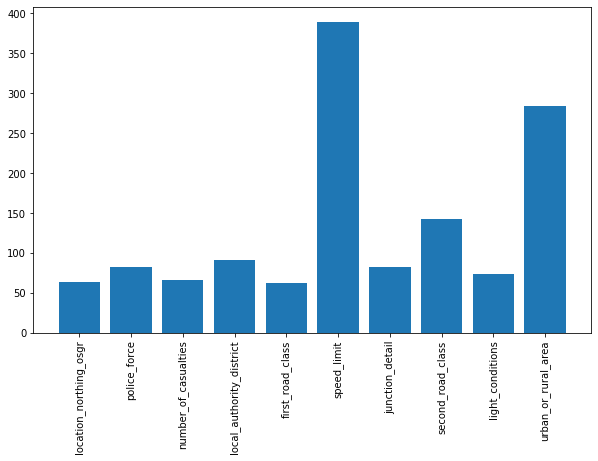

In [101]:
plt.figure(figsize=(10, 6))
plt.bar(names,scores)
plt.xticks(rotation='vertical')

In [104]:
# List of columns to be extracted
columns_to_extract = [
    "longitude", "police_force", "number_of_casualties", "local_authority_district",
    "first_road_class", "speed_limit", "junction_detail", "second_road_class",
    "light_conditions", "urban_or_rural_area"
]

# Extracting specific columns from the x_feautures DataFrame
x_feautures = x_feautures[columns_to_extract]
x_feautures

,longitude,police_force,number_of_casualties,local_authority_district,first_road_class,speed_limit,junction_detail,second_road_class,light_conditions,urban_or_rural_area
6009,0,1,1,20,3,30,3,6,1,1
13904,0,1,1,1,3,20,3,6,4,1
58906,0,41,2,33,3,60,0,0,1,1
83894,-2,55,1,643,6,20,3,6,1,1
76849,0,47,2,564,6,30,6,6,4,1
...,...,...,...,...,...,...,...,...,...,...
90965,-4,99,1,926,4,40,0,0,4,1
91047,-4,99,1,938,1,70,0,0,6,1
91078,-7,99,1,941,3,60,0,0,1,2
91089,-2,99,1,914,3,60,0,0,1,2


In [105]:
# Initializing a Decision Tree classifier with a specified minimum number of samples required to be at a leaf node.
# Setting 'min_samples_leaf' to 100 means that any leaf (end) node of the tree will have at least 100 samples.
tree = DecisionTreeClassifier(min_samples_leaf=100)

In [106]:
# Splitting the 'x_feautures' dataset and 'y_label' target variable into training and testing subsets.
# 70% of the data will be used for training and 30% will be used for testing.
# Setting 'random_state' ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(x_feautures, y_label, test_size=0.30, random_state=42)

# Fitting the Decision Tree classifier ('tree') to the training data.
# This trains the model on the 'X_train' feature data to predict the 'y_train' target variable.
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [107]:
# Using the trained Decision Tree classifier ('tree') to make predictions on the testing data.
# The 'predict' method returns the predicted labels for the given features.
y_pred = tree.predict(X_test)

# Calculating the accuracy of the Decision Tree model on the training data.
# The 'score' method returns the mean accuracy of the model on the given data and labels.
# We then round this score to 2 decimal places.
score = round(tree.score(X_train, y_train), 2)

# Displaying the rounded accuracy score.
score

0.67

In [108]:
# Performing a 10-fold cross-validation on the Decision Tree classifier ('tree') using the training data.
# 'cv=10' specifies that the data should be split into 10 folds.
# 'scoring='accuracy'' specifies that the evaluation metric is accuracy.
# 'return_estimator=True' means the function will also return the fitted models for each fold.
result_tree = cross_validate(tree, X_train, y_train, cv=10, scoring='accuracy', return_estimator=True)

In [109]:
result_tree

{'fit_time': array([0.00798011, 0.00717163, 0.00396252, 0.00498557, 0.0050168 ,
        0.01077533, 0.00701571, 0.00689149, 0.00898457, 0.00797987]),
 'score_time': array([0.00299644, 0.00282049, 0.00199723, 0.00199461, 0.00196362,
        0.00397873, 0.0039587 , 0.00399113, 0.00201464, 0.00395799]),
 'estimator': [DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100),
  DecisionTreeClassifier(min_samples_leaf=100)],
 'test_score': array([0.68717949, 0.66666667, 0.63589744, 0.71282051, 0.63589744,
        0.56410256, 0.62051282, 0.61340206, 0.63917526, 0.59278351])}

In [110]:
result_tree['test_score']

array([0.68717949, 0.66666667, 0.63589744, 0.71282051, 0.63589744,
       0.56410256, 0.62051282, 0.61340206, 0.63917526, 0.59278351])

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.71      0.60      0.65       417
        True       0.65      0.75      0.70       418

    accuracy                           0.68       835
   macro avg       0.68      0.68      0.67       835
weighted avg       0.68      0.68      0.67       835



In [113]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [114]:
def get_models():
    # Initializing a dictionary to store various machine learning models.
    models = dict()

    # Adding a Decision Tree classifier to the dictionary.
    models['dtree'] = DecisionTreeClassifier()

    # Adding a k-Nearest Neighbors classifier to the dictionary.
    models['knn'] = KNeighborsClassifier()

    # Adding a Gaussian Naive Bayes classifier to the dictionary.
    models['bayes'] = GaussianNB()

    # Adding a Random Forest classifier to the dictionary.
    models['rf'] = RandomForestClassifier()

    # Adding a custom stacking classifier (defined elsewhere) to the dictionary.
    # The get_stacking() function should return a stacking classifier, but it is assumed to be defined elsewhere in the code.
    models['stacking'] = get_stacking()

    # Returning the dictionary of models.
    return models

In [115]:
def evaluate_model(model, X, y):
    """
    Evaluate a model using Repeated Stratified K-Fold cross-validation.

    Parameters:
    - model: The machine learning model to be evaluated.
    - X: Feature matrix.
    - y: Target vector.

    Returns:
    - scores: Array of accuracy scores for each fold/repeat of the cross-validation.
    """
    
    # Initializing a Repeated Stratified K-Fold cross-validator.
    # n_splits=10 means the data will be split into 10 folds.
    # n_repeats=3 means the 10-fold cross-validation will be repeated 3 times.
    # random_state=1 ensures reproducibility.
    cv = RepeatedStratifiedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1
    )
    
    # Evaluating the provided model using the initialized cross-validator.
    # 'scoring="accuracy"' specifies that the evaluation metric is accuracy.
    # 'error_score='raise'' means any error during evaluation will raise an exception.
    scores = cross_val_score(
        model, X, y,
        scoring="accuracy",
        cv=cv, 
        error_score='raise'
    )
    
    # Returning the accuracy scores.
    return scores

In [116]:
def get_stacking():
    """
    Create and return a stacking classifier with multiple base models 
    and a final meta-learner (or blender).

    Returns:
    - model: The initialized stacking classifier.
    """
    
    # Initializing an empty list to hold the base models (level 0 models).
    level0 = []

    # Adding a Decision Tree classifier to the base models.
    level0.append(('dtree', DecisionTreeClassifier()))

    # Adding a k-Nearest Neighbors classifier to the base models.
    level0.append(('knn', KNeighborsClassifier()))

    # Adding a Gaussian Naive Bayes classifier to the base models.
    level0.append(('bayes', GaussianNB()))

    # Adding a Random Forest classifier to the base models.
    level0.append(('rf', RandomForestClassifier()))

    # Initializing a Logistic Regression model to act as the meta-learner (level 1 model).
    # This model learns to make final predictions based on the predictions of the base models.
    level1 = LogisticRegression()

    # Creating the stacking classifier. 
    # 'estimators' contains the base models.
    # 'final_estimator' is the meta-learner.
    # 'cv=5' specifies 5-fold cross-validation for training the meta-learner.
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    
    # Returning the initialized stacking classifier.
    return model

In [117]:
models = get_models()
models

{'dtree': DecisionTreeClassifier(),
 'knn': KNeighborsClassifier(),
 'bayes': GaussianNB(),
 'rf': RandomForestClassifier(),
 'stacking': StackingClassifier(cv=5,
                    estimators=[('dtree', DecisionTreeClassifier()),
                                ('knn', KNeighborsClassifier()),
                                ('bayes', GaussianNB()),
                                ('rf', RandomForestClassifier())],
                    final_estimator=LogisticRegression())}

In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
names = []
results = []
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(f"{name}:{mean(scores):3.2f} {std(scores):4.3f}")

warnings.filterwarnings('default')

dtree:0.60 0.030
knn:0.63 0.036
bayes:0.67 0.026
rf:0.65 0.025
stacking:0.68 0.026


In [120]:
results

[array([0.63076923, 0.58974359, 0.59487179, 0.63076923, 0.61538462,
        0.53333333, 0.60512821, 0.59793814, 0.57216495, 0.60309278,
        0.56923077, 0.55384615, 0.60512821, 0.60512821, 0.6       ,
        0.64615385, 0.6       , 0.55670103, 0.63402062, 0.59793814,
        0.58461538, 0.60512821, 0.57435897, 0.64102564, 0.64102564,
        0.61025641, 0.52820513, 0.57216495, 0.61340206, 0.55670103]),
 array([0.59487179, 0.62051282, 0.60512821, 0.70769231, 0.64102564,
        0.63076923, 0.54871795, 0.61340206, 0.6443299 , 0.6185567 ,
        0.61025641, 0.64615385, 0.67179487, 0.62564103, 0.67179487,
        0.66153846, 0.58461538, 0.62371134, 0.65979381, 0.61340206,
        0.58974359, 0.65641026, 0.63076923, 0.65641026, 0.59487179,
        0.68717949, 0.58974359, 0.60824742, 0.59793814, 0.56185567]),
 array([0.66153846, 0.61025641, 0.65641026, 0.6974359 , 0.69230769,
        0.67692308, 0.64102564, 0.68041237, 0.67525773, 0.64948454,
        0.66153846, 0.68205128, 0.68205128, 

In [121]:
names

['dtree', 'knn', 'bayes', 'rf', 'stacking']

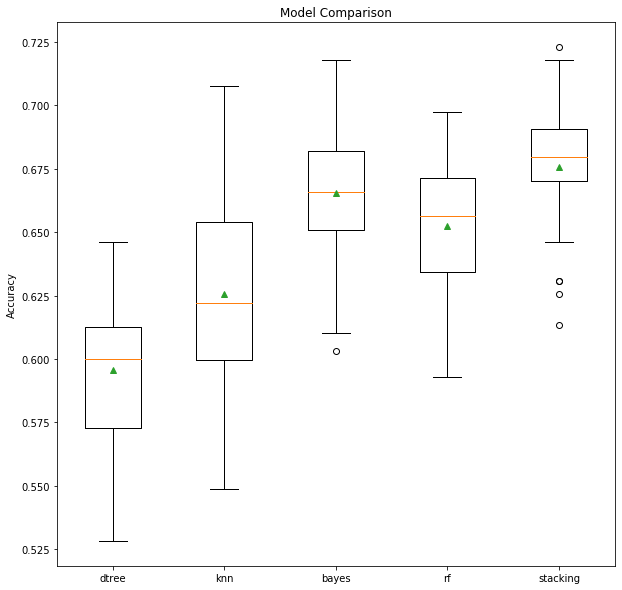

In [122]:
plt.figure(figsize=(10, 10))
plt.boxplot(results, labels = names, showmeans = True)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()